# Distributions


https://allendowney.github.io/ThinkStats/chap02.html

In [ ]:
!pip install empiricaldist

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from empiricaldist import FreqTab
from nsfg import prep_nsfg_data, download, read_fem_resp

## Frequency tables

One way to describe a variable is a frequency table, which contains the values of the variable and their frequencies – that is, the number of times each value appears. This description is called the distribution of the variable.

In [2]:
t = np.random.randint(0, 10, 25)

In [3]:
ftab = FreqTab.from_seq(t)
ftab

,freqs
0,1
2,3
3,4
4,2
5,4
6,2
7,4
8,2
9,3


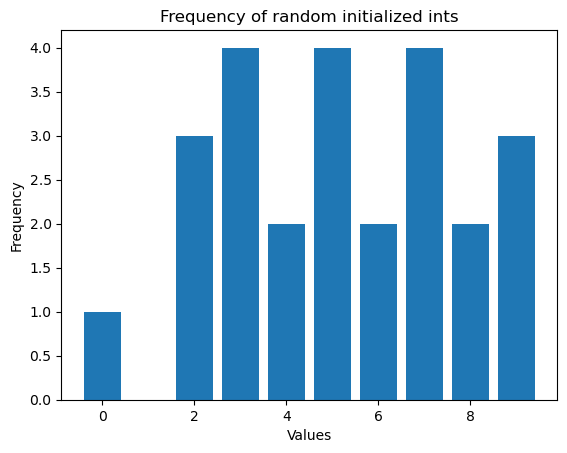

In [4]:
plt.title("Frequency of random initialized ints")
ftab.bar()

plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

In [5]:
ftab(1)

0

In [6]:
print(f"Ftab quantities: {ftab.qs}")
print(f"Ftab frequencies: {ftab.fs}")

Ftab quantities: [0 2 3 4 5 6 7 8 9]
Ftab frequencies: [1 3 4 2 4 2 4 2 3]


## NSFG

In [7]:
preg = prep_nsfg_data()

In [8]:
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,6.1875


In [9]:
outcome_live = preg.query("outcome == 1")

In [10]:
# From sequence
ftab_lb = FreqTab.from_seq(outcome_live["birthwgt_lb"], name="birthwgt_lb")

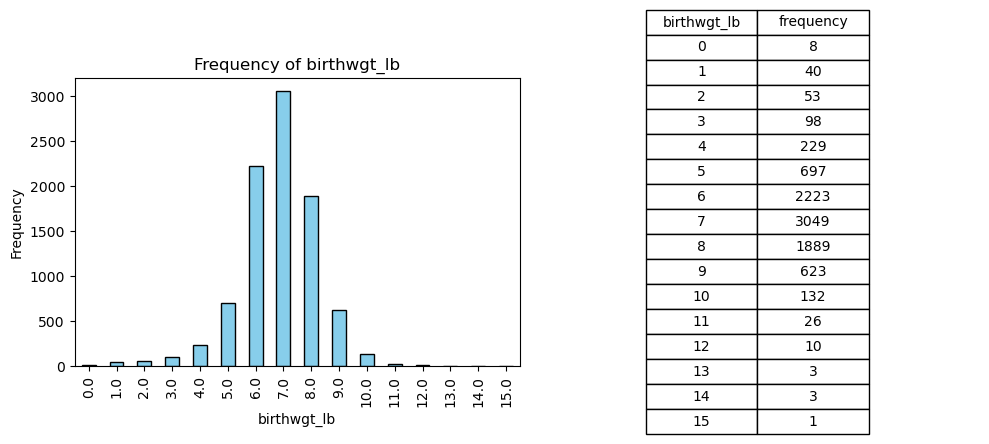

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

ftab_lb.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Frequency of birthwgt_lb')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('birthwgt_lb')

table_data = ftab_lb.reset_index(name="frequency")
axes[1].axis('off')
table = axes[1].table(cellText=np.int64(table_data.values),
                      colLabels=table_data.columns,
                      cellLoc='center',
                      loc='center')
table.scale(0.5, 2)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.show()

In [12]:
#Mode
ftab_lb.idxmax()
#OR
ftab_lb.mode()

7.0

In [13]:
ftab_oz = FreqTab.from_seq(outcome_live["birthwgt_oz"], name="birthwgt_oz")

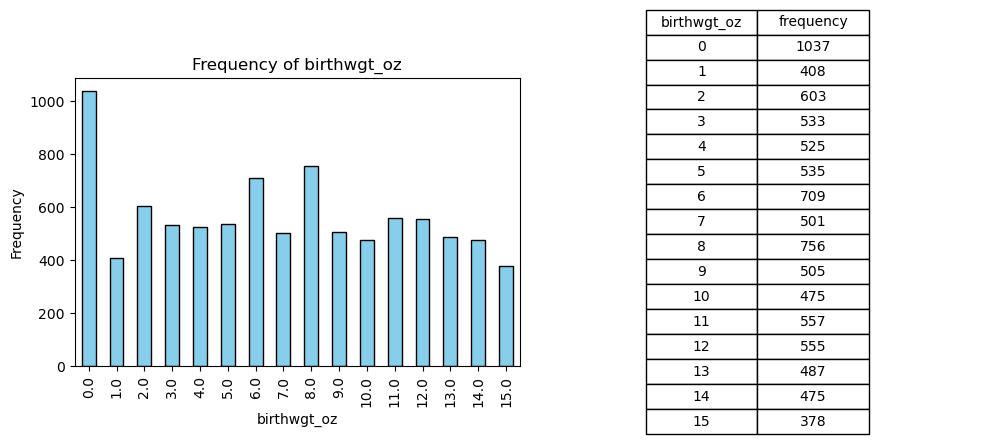

In [14]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

ftab_oz.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Frequency of birthwgt_oz')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('birthwgt_oz')

table_data = ftab_oz.reset_index(name="frequency")
axes[1].axis('off')
table = axes[1].table(cellText=np.int64(table_data.values),
                      colLabels=table_data.columns,
                      cellLoc='center',
                      loc='center')
table.scale(0.5, 2)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.show()

In [15]:
## Looks like 0 is more common, which suggest a round off from respondents to whole number of pounds

In [16]:
ftab_age = FreqTab.from_seq(seq=outcome_live["agepreg"], name="agepreg")

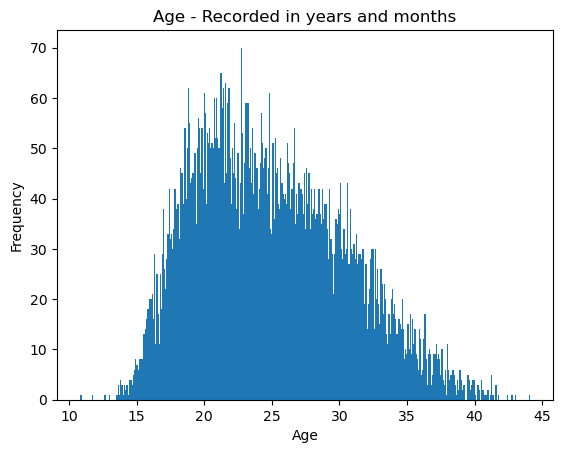

In [17]:
#Recorded in years and months
plt.title("Age - Recorded in years and months")
ftab_age.bar(width=0.1)

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [18]:
ftab_length = FreqTab.from_seq(outcome_live["prglngth"], name="prglngth")

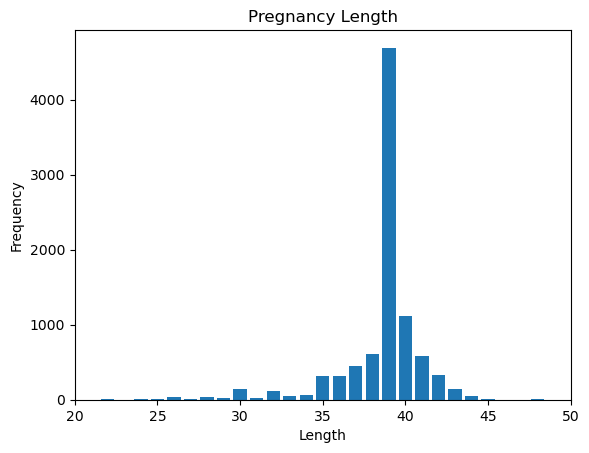

In [19]:
# Pregnancy length
ftab_length = FreqTab.from_seq(outcome_live["prglngth"], name="prglngth")

plt.title("Pregnancy Length")
ftab_length.bar()

plt.xlabel("Length")
plt.ylabel("Frequency")
plt.xlim(20, 50)
plt.show()

## Outliers

In [20]:
def smallest(ftab, n=10):
    return ftab[:n]

In [21]:
def largest(ftab, n=10):
    return ftab[-n:]

In [22]:
smallest(ftab_length)

prglngth
0     1
4     1
9     1
13    1
17    2
18    1
19    1
20    1
21    2
22    7
Name: prglngth, dtype: int64

In [23]:
largest(ftab_length)

prglngth
40    1116
41     587
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

## First Babies

In [24]:
firsts = outcome_live.query("birthord == 1")
others = outcome_live.query("birthord != 1")

In [25]:
ftab_first = FreqTab.from_seq(firsts["prglngth"], name="firsts")
ftab_other = FreqTab.from_seq(others["prglngth"], name="others")

In [75]:
def two_bar_plots(ftab1, ftab2, label_1="Label 1", label_2="Label 2", width=0.45):
    ftab1.bar(align="edge", width=-width, label=label_1)
    ftab2.bar(align="edge", width=width, alpha=0.5, label=label_2)

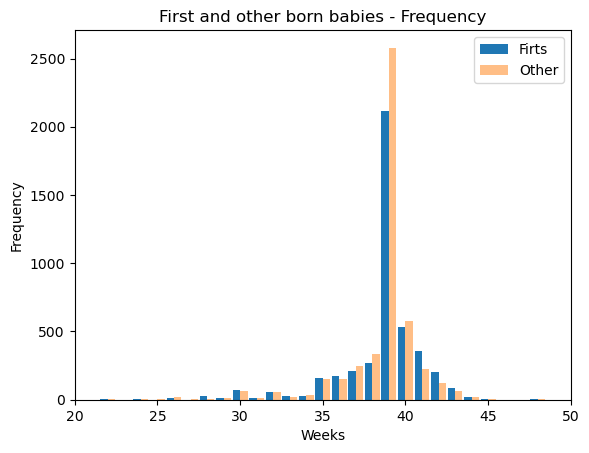

In [78]:
plt.title("First and other born babies - Frequency")
two_bar_plots(ftab_first, ftab_other, label_1="Firts", label_2="Other")

plt.xlabel("Weeks")
plt.ylabel("Frequency")
plt.xlim(20, 50)
plt.legend()
plt.show()

In [28]:
firsts["prglngth"].count(), others["prglngth"].count()

(4413, 4735)

In [29]:
first_mean = firsts["prglngth"].mean()
other_mean = others["prglngth"].mean()
first_mean, other_mean
# First babies mean preg length is a little bit larger

(38.60095173351461, 38.52291446673706)

In [30]:
diff = first_mean - other_mean
diff, diff * 7 * 24
# Only 13 hour difference between means

(0.07803726677754952, 13.11026081862832)

* There might be an actual difference in average pregnancy length between first babies and others.

* The apparent difference we see in this dataset might be the result of bias in the sampling process – that is, the selection of survey respondents.

* The apparent difference might be the result of measurement error – for example, the self-reported pregnancy lengths might be more accurate for first babies or others.

* The apparent difference might be the result of random variation in the sampling process.

## Effect Size

- absolute terms: difference is 0.078 weeks, 13 hour
- relative terms: 0.2% 
- standardized terms

In [31]:
#Absolute Terms
diff, diff * 7 * 24

(0.07803726677754952, 13.11026081862832)

In [32]:
#Relative terms
diff / outcome_live["prglngth"].mean() * 100

0.20237586646738304

In [33]:
#Standardized Terms - pooled standard deviation = Cohen’s effect size
def cohen_effect_size(group1, group2):
    diff = group1.mean() - group2.mean()

    v1, v2 = group1.var(), group2.var()
    n1, n2 = group1.count(), group2.count()
    pooled_var = (n1 * v1 + n2 * v2) / (n1 + n2)

    return diff / np.sqrt(pooled_var)

In [34]:
#the difference is 0.029 standard deviations, which is small
cohen_effect_size(firsts["prglngth"], others["prglngth"])

0.028879044654449883

## Glossary

distribution: The set of values and how frequently each value appears in a dataset.

frequency table: A mapping from values to frequencies.

frequency: The number of times a value appears in a sample.

skewed: A distribution is skewed if it is asymmetrical, with extreme quantities extending farther in one direction than the other.

mode: The most frequent quantity in a sample, or one of the most frequent quantities.

uniform distribution: A distribution in which all quantities have the same frequency.

outlier: An extreme quantity in a distribution.

standardized: A statistic is standardized if it is expressed in terms that are comparable across different datasets and domains.

pooled standard deviation: A statistic that combines data from two or more groups to compute a common standard deviation.

Cohen’s effect size: A standardized statistic that quantifies the difference in the means of two groups.

practically significant: An effect is practically significant if it is big enough to matter in practice.

In [35]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemResp.dct", path="datasets/nsfg/")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemResp.dat.gz", path="datasets/nsfg/")

## 2.8.1. Exercise 2.1

We’ll start with ```totincr```, which records the total income for the respondent’s family, encoded with a value from 1 to 14. You can read the codebook for the respondent file to see what income level each value represents.

Make a FreqTab object to represent the distribution of this variable and plot it as a bar chart.

In [36]:
resp = read_fem_resp()
resp.shape

(7643, 3092)

In [38]:
ftab_totinc = FreqTab.from_seq(resp["totincr"], name="totincr")

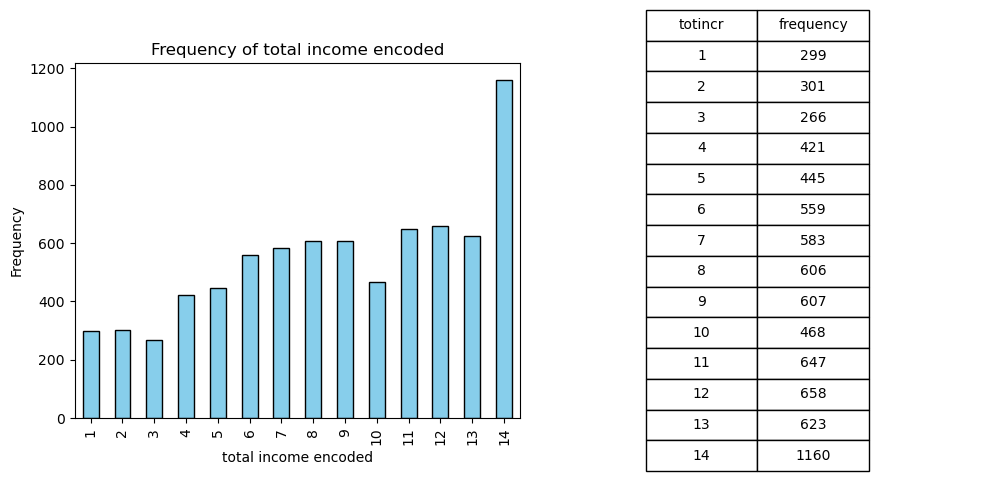

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

ftab_totinc.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Frequency of total income encoded')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Total income encoded')

table_data = ftab_totinc.reset_index(name="frequency")
axes[1].axis('off')
table = axes[1].table(cellText=np.int64(table_data.values),
                      colLabels=table_data.columns,
                      cellLoc='center',
                      loc='center')
table.scale(0.5, 2)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.show()

## 2.8.2. Exercise 2.2

Make a frequency table of the parity column, which records the number of children each respondent has borne. How would you describe the shape of this distribution?

Use the largest function to find the largest values of parity. Are there any values you think are errors?

In [42]:
ftab_parity = FreqTab.from_seq(resp["parity"], name="parity")

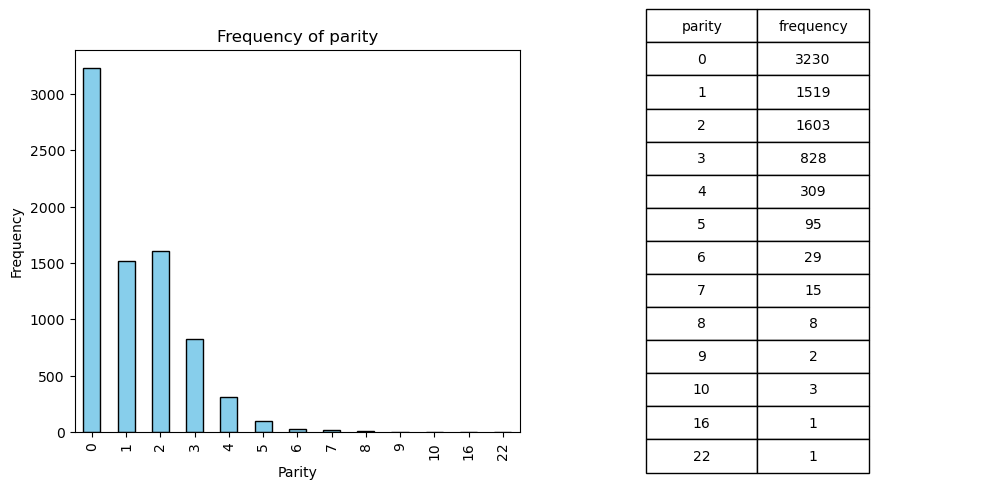

In [45]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

ftab_parity.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Frequency of parity')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Parity')

table_data = ftab_parity.reset_index(name="frequency")
axes[1].axis('off')
table = axes[1].table(cellText=np.int64(table_data.values),
                      colLabels=table_data.columns,
                      cellLoc='center',
                      loc='center')
table.scale(0.5, 2)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.show()

In [46]:
# Skewed left (extremly), few children per respondent/household

In [47]:
largest(ftab_parity)

parity
3     828
4     309
5      95
6      29
7      15
8       8
9       2
10      3
16      1
22      1
Name: parity, dtype: int64

## 2.8.3. Exercise 2.3

Let’s investigate whether people with higher income bear more children. Use the query method to select the respondents with the highest income (level 14). Plot the frequency table of parity for just the high income respondents.

Compare the mean parity for high income respondents and others.

Compute Cohen’s effect size for this difference. How does it compare with the difference in pregnancy length for first babies and others?

Do these results show that people with higher income have more children, or can you think of another explanation for the apparent difference?

In [61]:
high_income_resp = resp.query("totincr == 14")
other_income_resp = resp.query("totincr != 14")

In [62]:
ftab_parity_h = FreqTab.from_seq(high_income_resp["parity"], name="parity")
ftab_parity_o = FreqTab.from_seq(other_income_resp["parity"], name="parity")

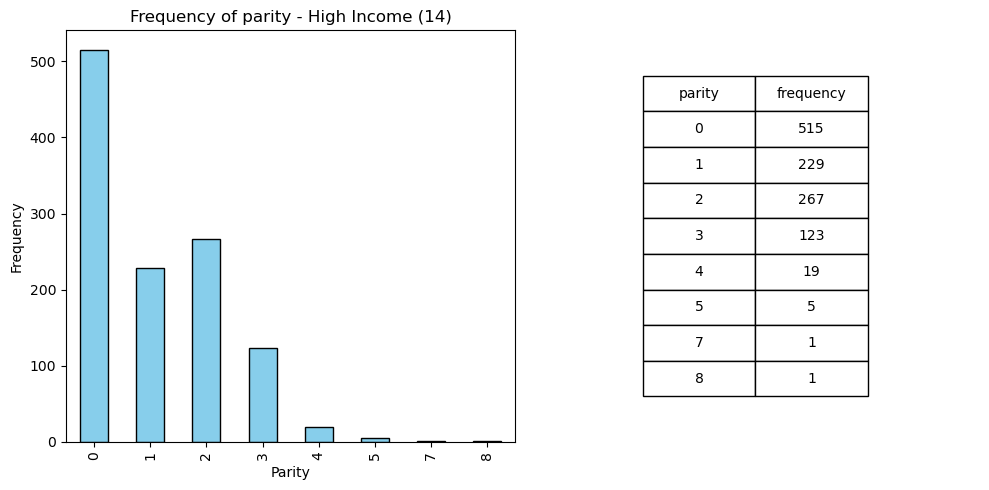

In [58]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

ftab_parity_h.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Frequency of parity - High Income (14)')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Parity')

table_data = ftab_parity_h.reset_index(name="frequency")
axes[1].axis('off')
table = axes[1].table(cellText=np.int64(table_data.values),
                      colLabels=table_data.columns,
                      cellLoc='center',
                      loc='center')
table.scale(0.5, 2)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.show()

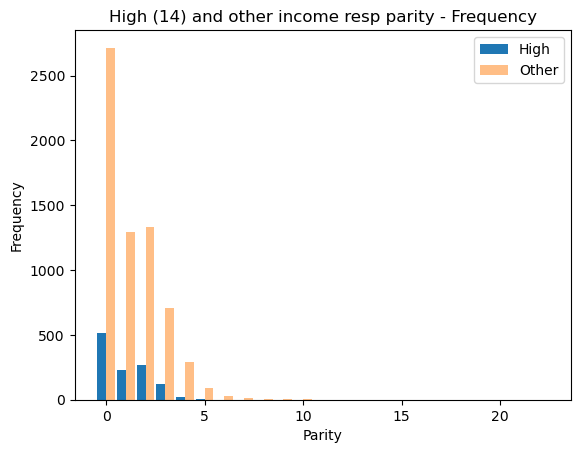

In [80]:
plt.title("High (14) and other income resp parity - Frequency")
two_bar_plots(ftab_parity_h, ftab_parity_o, label_1="High", label_2="Other")

plt.xlabel("Parity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [98]:
print(f"High income parity mean: {high_income_resp.parity.mean()}")
print(f"Other income parity mean: {other_income_resp.parity.mean()}")
print(f"Absolute diff: {high_income_resp.parity.mean()-other_income_resp.parity.mean()}")
print(f"Relative diff: {round(abs((high_income_resp.parity.mean()-other_income_resp.parity.mean()) / resp.parity.mean()) * 100, 3)}%")
print(f"Cohen effect: {cohen_effect_size(high_income_resp.parity, other_income_resp.parity)}")

High income parity mean: 1.0758620689655172
Other income parity mean: 1.2495758136665125
Absolute diff: -0.17371374470099532
Relative diff: 14.201%
Cohen effect: -0.1251185531466061
